In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from src.metrics import *
from src.models import * 
from src.concept_vectors import *
import csv
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import seaborn as sns
import json 
import pickle 

2024-01-30 11:42:04.692309: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Quantitative Evaluation

### Generate Tables

In [24]:
dataset_name = 'cub'
methods = ['tcav','cem','concept2vec','label']
nice_names = ['TCAV','CEM','Concept2Vec','Label']

In [25]:
cub_dict = {}
dataset_name = 'CUB'
for m,m_nice in zip(methods,nice_names):
    cub_dict[m_nice] = {}
    file_name = "results/evaluation/{}/{}_{}.txt".format(dataset_name,dataset_name.lower(),m)
    data = open(file_name).read().strip().split("\n")
        
    for line in data:
        name, value = line.split(": ")
        name = name.lower().split(" ")[-1]
        value = eval(value)
        cub_dict[m_nice][name] = value
    

In [26]:
dsprites_dict = {}
dataset_name = 'dsprites'
for m,m_nice in zip(methods,nice_names):
    dsprites_dict[m_nice] = {}
    file_name = "results/evaluation/{}/{}_{}.txt".format(dataset_name,dataset_name.lower(),m)
    data = open(file_name).read().strip().split("\n")
        
    for line in data:
        name, value = line.split(": ")
        name = name.lower().split(" ")[-1]
        value = eval(value)
        dsprites_dict[m_nice][name] = value
    

In [27]:
mnist_dict = {}
dataset_name = 'colored_mnist'
for m,m_nice in zip(methods,nice_names):
    mnist_dict[m_nice] = {}
    file_name = "results/evaluation/{}/{}_{}.txt".format(dataset_name,dataset_name.replace('colored_',''),m)
    data = open(file_name).read().strip().split("\n")
        
    for line in data:
        name, value = line.split(": ")
        name = name.lower().split(" ")[-1]
        value = eval(value)
        mnist_dict[m_nice][name] = value
    

In [28]:
chexpert_dict = {}
dataset_name = 'chexpert'
for m,m_nice in zip(methods,nice_names):
    chexpert_dict[m_nice] = {}
    file_name = "results/evaluation/{}/{}_{}.txt".format(dataset_name,dataset_name.lower(),m)
    data = open(file_name).read().strip().split("\n")
        
    for line in data:
        name, value = line.split(": ")
        name = name.lower().split(" ")[-1]
        value = eval(value)
        chexpert_dict[m_nice][name] = value
    

In [29]:
all_dicts = {
    'mnist': mnist_dict,
    'cub': cub_dict,
    'dsprites': dsprites_dict,
    'chexpert': chexpert_dict,
}

In [37]:
columns = ['truthfulness','robustness','responsiveness','stability']
datasets = ['mnist','cub'] 
for m in nice_names:
    values = [[all_dicts[d][m][c] for c in columns] for d in datasets]
    for i in values:
        i[1] = (1-i[1][0],i[1][1])
        i[3] = (1-i[3][0],i[3][1])

    s = "{} & ".format(m)
    
    other_values = []
    
    for d in range(len(datasets)):
        for i in values[d]:
            if m == 'Label':
                other_values.append("\\textbf{{{:0.2f} $\\pm$ {:0.2f}}}".format(i[0],i[1]))
            else: 
                other_values.append("{:0.2f} $\\pm$ {:0.2f}".format(i[0],i[1]))
    s += " & ".join(other_values)
    s += " \\\\"

    if m == "Label":
        s += " \\bottomrule"

    print(s)


TCAV & 1.00 $\pm$ 0.00 & 0.12 $\pm$ 0.06 & 0.95 $\pm$ 0.04 & 1.00 $\pm$ 0.00 & 0.08 $\pm$ 0.01 & 0.00 $\pm$ 0.00 & 0.99 $\pm$ 0.00 & 0.01 $\pm$ 0.00 \\
CEM & 0.87 $\pm$ 0.19 & 0.80 $\pm$ 0.08 & 0.95 $\pm$ 0.07 & 0.87 $\pm$ 0.09 & 0.06 $\pm$ 0.00 & 0.02 $\pm$ 0.01 & 0.98 $\pm$ 0.01 & 0.03 $\pm$ 0.00 \\
Concept2Vec & 1.00 $\pm$ 0.00 & 1.00 $\pm$ 0.00 & 0.95 $\pm$ 0.04 & 1.00 $\pm$ 0.00 & 0.41 $\pm$ 0.01 & 0.31 $\pm$ 0.02 & 0.98 $\pm$ 0.01 & 0.29 $\pm$ 0.02 \\
Label & \textbf{1.00 $\pm$ 0.00} & \textbf{1.00 $\pm$ 0.00} & \textbf{1.00 $\pm$ 0.00} & \textbf{1.00 $\pm$ 0.00} & \textbf{0.73 $\pm$ 0.00} & \textbf{0.97 $\pm$ 0.00} & \textbf{0.97 $\pm$ 0.00} & \textbf{1.00 $\pm$ 0.00} \\ \bottomrule


In [40]:
columns = ['truthfulness','robustness','responsiveness','stability']
datasets = ['dsprites','chexpert'] 
for m in nice_names:
    values = [[all_dicts[d][m][c] for c in columns] for d in datasets]
    for i in values:
        i[1] = (1-i[1][0],i[1][1])
        i[3] = (1-i[3][0],i[3][1])

    s = "{} & ".format(m)
    
    other_values = []
    
    for d in range(len(datasets)):
        for num,i in enumerate(values[d]):
            if (m == "Label" and (datasets[d]!= 'dsprites' or num!=1)) or (m == "TCAV" and (datasets[d]== 'dsprites' and num==1)):
                other_values.append("\\textbf{{{:0.2f} $\\pm$ {:0.2f}}}".format(i[0],i[1]))
            else:
                other_values.append("{:0.2f} $\\pm$ {:0.2f}".format(i[0],i[1]))
    s += " & ".join(other_values)
    s += " \\\\"

    if m == "Label":
        s += " \\bottomrule"

    print(s)


TCAV & 0.30 $\pm$ 0.01 & \textbf{0.40 $\pm$ 0.05} & 0.81 $\pm$ 0.05 & 0.56 $\pm$ 0.04 & 0.47 $\pm$ 0.03 & 0.21 $\pm$ 0.05 & 0.76 $\pm$ 0.08 & 0.26 $\pm$ 0.07 \\
CEM & 0.27 $\pm$ 0.01 & 0.24 $\pm$ 0.16 & 0.88 $\pm$ 0.05 & 0.71 $\pm$ 0.03 & 0.41 $\pm$ 0.05 & 0.50 $\pm$ 0.12 & 0.73 $\pm$ 0.13 & 0.44 $\pm$ 0.07 \\
Concept2Vec & 0.31 $\pm$ 0.03 & 0.12 $\pm$ 0.04 & 0.84 $\pm$ 0.03 & 0.83 $\pm$ 0.03 & 0.44 $\pm$ 0.06 & 0.64 $\pm$ 0.08 & 0.76 $\pm$ 0.03 & 0.43 $\pm$ 0.05 \\
Label & \textbf{0.50 $\pm$ 0.00} & 0.19 $\pm$ 0.00 & \textbf{0.78 $\pm$ 0.00} & \textbf{1.00 $\pm$ 0.00} & \textbf{0.52 $\pm$ 0.00} & \textbf{0.92 $\pm$ 0.00} & \textbf{0.79 $\pm$ 0.00} & \textbf{1.00 $\pm$ 0.00} \\ \bottomrule


#### Plotting Truthfulness

[1.         0.07559524 0.3037037  0.47179487] [0.         0.00890871 0.01385799 0.02900951] [0 1 2 3]
[0.86666667 0.05535714 0.27037037 0.40512821] [0.18856181 0.00252538 0.01047566 0.05076664] [0 1 2 3]
[1.         0.41130952 0.30740741 0.44102564] [0.         0.0124004  0.02771598 0.06322476] [0 1 2 3]
[1.         0.73214286 0.5        0.52307692] [0. 0. 0. 0.] [0 1 2 3]


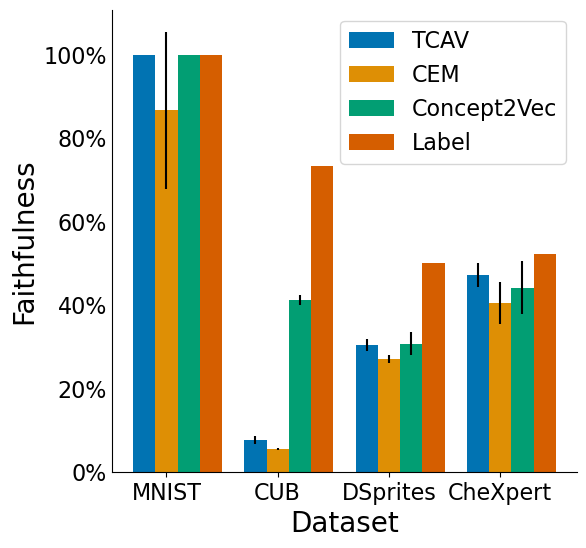

In [8]:
datasets = ['colored_mnist','CUB','dsprites','chexpert']
methods = ['tcav','cem','concept2vec','label']

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in methods:
        file_name = "results/evaluation/{}/{}_{}.txt".format(d,d.lower().replace("colored_",""),m)
        f = open(file_name).read().split("\n")
        f = [i for i in f if 'Truthfulness' in i][0]
        f = eval(f.split(": ")[1])
        mean, std = f
        truth_data[d].append((mean,std))

datasets = ['MNIST','CUB','DSprites','CheXpert']
methods = ['TCAV','CEM','Concept2Vec','Label']

cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t[0] for t in group_data]
    group_stds = [t[1] for t in group_data]
    means.append(group_means)
    stds.append(group_stds)
    
means = list(np.array(means).T)
stds = list(np.array(stds).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Faithfulness',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = means[i]
    group_stds = stds[i]
    print(group_means,group_stds,ind)
    ax.bar(ind + i*width, group_means, width, label=datasets, yerr=group_stds)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(methods,fontsize=16)

plt.savefig('figures/bar_plot_faithfulness.pdf', dpi=300, bbox_inches='tight')    

# Show the plot
plt.show()


[0.11666666666666659, 0.0029761904761903546, 0.3950617283950618, 0.2136752136752137] [0.06236096 0.00243005 0.04860499 0.0526873 ] [0 1 2 3]
[0.8, 0.024801587301587324, 0.2407407407407408, 0.49572649572649574] [0.08164966 0.01148397 0.15930232 0.11530545] [0 1 2 3]
[1.0, 0.3134920634920636, 0.12345679012345678, 0.641025641025641] [0.         0.01855981 0.04364857 0.07548514] [0 1 2 3]
[1.0, 0.9732142857142857, 0.18518518518518512, 0.9230769230769231] [0. 0. 0. 0.] [0 1 2 3]


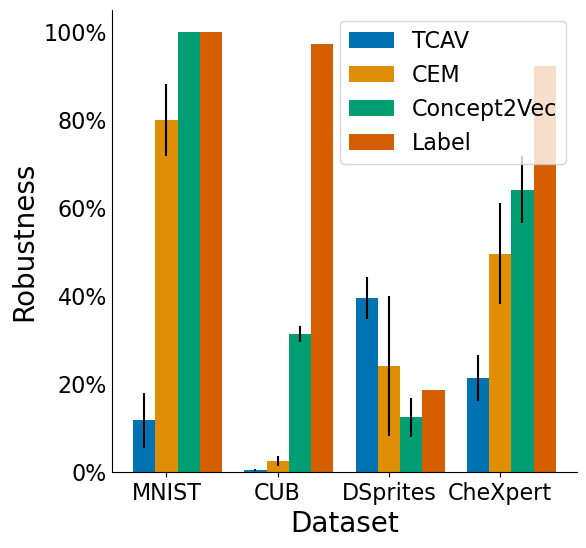

In [9]:
datasets = ['colored_mnist','CUB','dsprites','chexpert']
methods = ['tcav','cem','concept2vec','label']

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in methods:
        file_name = "results/evaluation/{}/{}_{}.txt".format(d,d.lower().replace("colored_",""),m)
        f = open(file_name).read().split("\n")
        f = [i for i in f if 'Robustness' in i][0]
        f = eval(f.split(": ")[1])
        mean, std = f
        truth_data[d].append((mean,std))

datasets = ['MNIST','CUB','DSprites','CheXpert']
methods = ['TCAV','CEM','Concept2Vec','Label']

cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t[0] for t in group_data]
    group_stds = [t[1] for t in group_data]
    means.append(group_means)
    stds.append(group_stds)
    
means = list(np.array(means).T)
stds = list(np.array(stds).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Robustness',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = [1-j for j in means[i]] # Flip Robustness due to definition
    group_stds = stds[i]
    print(group_means,group_stds,ind)
    ax.bar(ind + i*width, group_means, width, label=datasets, yerr=group_stds)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(methods,fontsize=16)

plt.savefig('figures/bar_plot_robustness.pdf', dpi=300, bbox_inches='tight')    

# Show the plot
plt.show()


[0.9500000000000001, 0.9880952380952381, 0.8148148148148148, 0.7606837606837606] [0.04082483 0.0048601  0.05237828 0.08461107] [0 1 2 3]
[0.9500000000000001, 0.9771825396825397, 0.8765432098765432, 0.7264957264957265] [0.07071068 0.00853405 0.05310077 0.12791991] [0 1 2 3]
[0.9500000000000001, 0.9781746031746031, 0.8395061728395062, 0.7606837606837606] [0.04082483 0.00781152 0.03147543 0.03197998] [0 1 2 3]
[1.0, 0.9672619047619048, 0.7777777777777778, 0.794871794871795] [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16] [0 1 2 3]


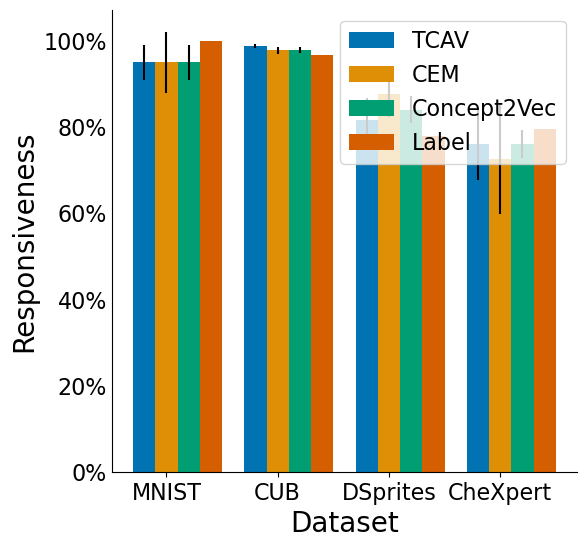

In [10]:
datasets = ['colored_mnist','CUB','dsprites','chexpert']
methods = ['tcav','cem','concept2vec','label']

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in methods:
        file_name = "results/evaluation/{}/{}_{}.txt".format(d,d.lower().replace("colored_",""),m)
        f = open(file_name).read().split("\n")
        f = [i for i in f if 'Responsiveness' in i][0]
        f = eval(f.split(": ")[1])
        mean, std = f
        truth_data[d].append((mean,std))

datasets = ['MNIST','CUB','DSprites','CheXpert']
methods = ['TCAV','CEM','Concept2Vec','Label']

cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t[0] for t in group_data]
    group_stds = [t[1] for t in group_data]
    means.append(group_means)
    stds.append(group_stds)
    
means = list(np.array(means).T)
stds = list(np.array(stds).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Responsiveness',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = [j for j in means[i]] # Flip Robustness due to definition
    group_stds = stds[i]
    print(group_means,group_stds,ind)
    ax.bar(ind + i*width, group_means, width, label=datasets, yerr=group_stds)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(methods,fontsize=16)

plt.savefig('figures/bar_plot_responsiveness.pdf', dpi=300, bbox_inches='tight')    

# Show the plot
plt.show()


[1.0, 0.010912698412698263, 0.5555555555555556, 0.2564102564102564] [0.         0.00371196 0.04000457 0.07252377] [0 1 2 3]
[0.8666666666666667, 0.02777777777777779, 0.7098765432098766, 0.4444444444444443] [0.0942809  0.00371196 0.03147543 0.06729921] [0 1 2 3]
[1.0, 0.29166666666666663, 0.8333333333333333, 0.4273504273504274] [0.         0.0159349  0.02618914 0.0526873 ] [0 1 2 3]
[1.0, 1.0, 1.0, 1.0] [0. 0. 0. 0.] [0 1 2 3]


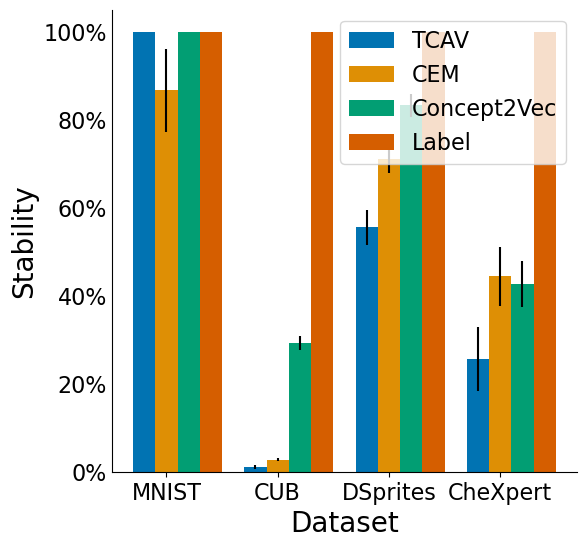

In [11]:
datasets = ['colored_mnist','CUB','dsprites','chexpert']
methods = ['tcav','cem','concept2vec','label']

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in methods:
        file_name = "results/evaluation/{}/{}_{}.txt".format(d,d.lower().replace("colored_",""),m)
        f = open(file_name).read().split("\n")
        f = [i for i in f if 'Stability' in i][0]
        f = eval(f.split(": ")[1])
        mean, std = f
        truth_data[d].append((mean,std))

datasets = ['MNIST','CUB','DSprites','CheXpert']
methods = ['TCAV','CEM','Concept2Vec','Label']

cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t[0] for t in group_data]
    group_stds = [t[1] for t in group_data]
    means.append(group_means)
    stds.append(group_stds)
    
means = list(np.array(means).T)
stds = list(np.array(stds).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Stability',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = [1-j for j in means[i]] # Flip Robustness due to definition
    group_stds = stds[i]
    print(group_means,group_stds,ind)
    ax.bar(ind + i*width, group_means, width, label=datasets, yerr=group_stds)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(methods,fontsize=16)

plt.savefig('figures/bar_plot_stability.pdf', dpi=300, bbox_inches='tight')    

# Show the plot
plt.show()


[1.0, 0.0755952380952381, 0.30370370370370375, 0.47179487179487173] [0.         0.00890871 0.01385799 0.02900951] [0 1 2 3]
[0.8666666666666667, 0.05535714285714286, 0.2703703703703704, 0.4051282051282052] [0.18856181 0.00252538 0.01047566 0.05076664] [0 1 2 3]
[1.0, 0.41130952380952385, 0.3074074074074075, 0.441025641025641] [0.         0.0124004  0.02771598 0.06322476] [0 1 2 3]
[1.0, 0.7321428571428571, 0.5, 0.5230769230769231] [0. 0. 0. 0.] [0 1 2 3]
[0.11666666666666659, 0.0029761904761903546, 0.3950617283950618, 0.2136752136752137] [0.06236096 0.00243005 0.04860499 0.0526873 ] [0 1 2 3]
[0.8, 0.024801587301587324, 0.2407407407407408, 0.49572649572649574] [0.08164966 0.01148397 0.15930232 0.11530545] [0 1 2 3]
[1.0, 0.3134920634920636, 0.12345679012345678, 0.641025641025641] [0.         0.01855981 0.04364857 0.07548514] [0 1 2 3]
[1.0, 0.9732142857142857, 0.18518518518518512, 0.9230769230769231] [0. 0. 0. 0.] [0 1 2 3]
[0.9500000000000001, 0.9880952380952381, 0.8148148148148148, 0

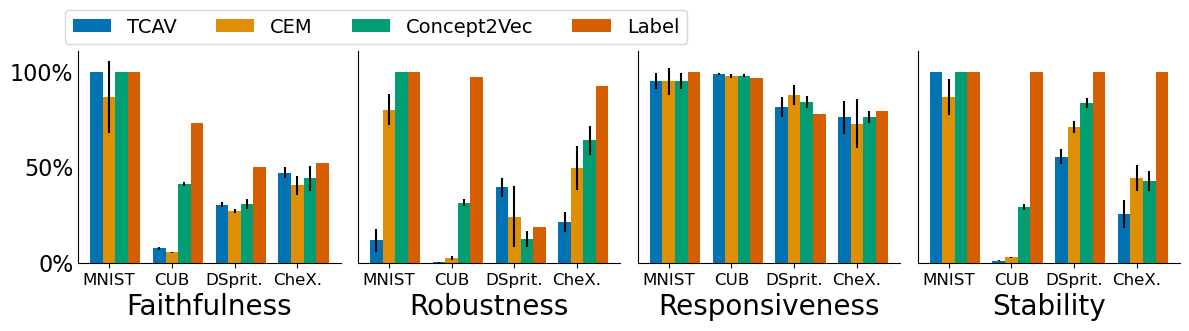

In [61]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
metrics = ['Truthfulness','Robustness','Responsiveness','Stability']
labels = ["Faithfulness","Robustness","Responsiveness","Stability"]

for i in range(4):
    datasets = ['colored_mnist','CUB','dsprites','chexpert']
    methods = ['tcav','cem','concept2vec','label']

    truth_data = {}

    for d in datasets:
        truth_data[d] = []
        
        for m in methods:
            file_name = "results/evaluation/{}/{}_{}.txt".format(d,d.lower().replace("colored_",""),m)
            f = open(file_name).read().split("\n")
            f = [j for j in f if metrics[i] in j][0]
            f = eval(f.split(": ")[1])
            mean, std = f
            truth_data[d].append((mean,std))

    datasets = ['MNIST','CUB','DSprit.','CheX.']
    methods = ['TCAV','CEM','Concept2Vec','Label']

    cb_palette = sns.color_palette("colorblind")

    # Set the color cycle to use this palette
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

    means = []
    stds = []
    for group in truth_data.keys():
        group_data = truth_data[group]
        group_means = [t[0] for t in group_data]
        group_stds = [t[1] for t in group_data]
        means.append(group_means)
        stds.append(group_stds)
        
    means = list(np.array(means).T)
    stds = list(np.array(stds).T)

    # Set the x-ticks and labels
    ind = np.arange(len(datasets))
    axes[i].set_xticks(ind)
    axes[i].set_xticklabels(datasets)

    # Set the y-axis label
    axes[i].set_xlabel(labels[i],fontsize=20)

    # Plot the bars with standard deviation error bars
    width = 0.2
    for m in range(len(means)):            
        if metrics[i] == 'Truthfulness' or metrics[i] == 'Responsiveness':
            group_means = [j for j in means[m]] # Flip Robustness due to definition
        else:
            group_means = [1-j for j in means[m]] # Flip Robustness due to definition
        group_stds = stds[m]
        print(group_means,group_stds,ind)
        axes[i].bar(ind + m*width, group_means, width, label=datasets, yerr=group_stds)

    axes[i].set_xticks([r + width for r in range(len(ind))])
    axes[i].set_xticklabels(datasets,fontsize=12)
        
    fmt = mtick.PercentFormatter(xmax=1.0)
    axes[i].yaxis.set_major_formatter(fmt)
    plt.yticks(fontsize=20)

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].tick_params(axis='y', length=0)
    axes[i].tick_params(axis='y', labelsize=16)  # Set fontsize for y-axis tick labels

fig.legend(methods,loc='upper left', bbox_to_anchor=(0.05, 1.12), ncol=4,fontsize=14)
plt.tight_layout()

# Show the plot
fig.savefig("figures/bar_plot_all.pdf", dpi=300, bbox_inches='tight')
plt.show()

### Shapley Plots

[0.9682539682539683, 0.996031746031746, 0.9506172839506173, 0.9658119658119658] [0.02244783 0.00280598 0.00872971 0.02417459] [0 1 2 3]
[0.9523809523809523, 0.6140873015873016, 0.6111111111111112, 0.36752136752136755] [0.         0.04097595 0.01512031 0.03197998] [0 1 2 3]
[0.9523809523809523, 0.626984126984127, 0.4320987654320988, 0.2991452991452991] [0.         0.00853405 0.06110799 0.0792617 ] [0 1 2 3]
[0.9523809523809522, 0.7541666666666668, 0.4444444444444444, 0.4820512820512821] [1.11022302e-16 2.22717702e-03 0.00000000e+00 3.16123795e-02] [0 1 2 3]


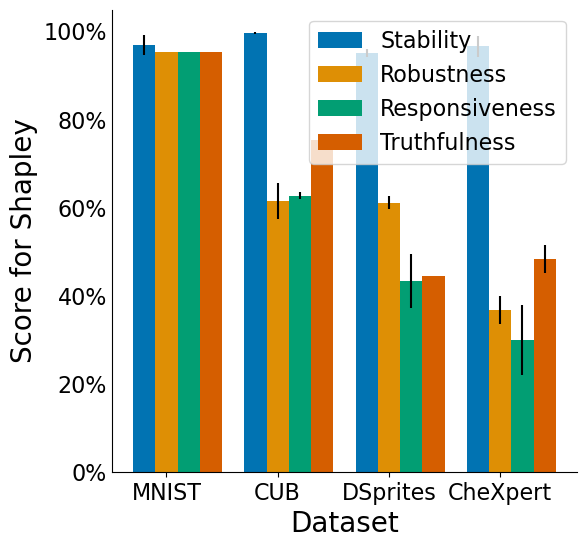

In [17]:
datasets = ['colored_mnist','CUB','dsprites','chexpert']
metrics = ['Stability','Robustness','Responsiveness','Truthfulness']

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in metrics:
        file_name = "results/evaluation/{}/{}_{}.txt".format(d,d.lower().replace("colored_",""),'shapley')
        f = open(file_name).read().split("\n")
        f = [i for i in f if m in i][0]
        f = eval(f.split(": ")[1])
        mean, std = f

        if m in ['Stability','Robustness','Responsiveness']:
            mean = 1-mean

        truth_data[d].append((mean,std))

datasets = ['MNIST','CUB','DSprites','CheXpert']

cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t[0] for t in group_data]
    group_stds = [t[1] for t in group_data]
    means.append(group_means)
    stds.append(group_stds)
    
means = list(np.array(means).T)
stds = list(np.array(stds).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Score for Shapley',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = [j for j in means[i]] # Flip Robustness due to definition
    group_stds = stds[i]
    print(group_means,group_stds,ind)
    ax.bar(ind + i*width, group_means, width, label=datasets, yerr=group_stds)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(metrics,fontsize=16)

plt.savefig("figures/shapley_metrics.pdf",dpi=300,bbox_inches='tight')

# Show the plot

plt.show()


# Intervention Experiments

In [8]:
def plot_intervention(methods,names,dataset,dataset_name,total_concepts,ylim,yticks):
    if type(methods) == type("a"):
        results = json.load(open("results/intervention/{}/{}.json".format(dataset,methods)))
        results = [results[str(i)] for i in sorted(map(int,results.keys()))]
    else:
        results = [json.load(open("results/intervention/{}/{}.json".format(dataset,i))) for i in methods]
    
    clrs = sns.color_palette("colorblind", 10)
    styles = ['-' for i in range(len(names))]

    if "epochs" in names[0]:
        styles[3:] = ["--" for i in range(3)]
        clrs[3:6] = clrs[:3]

    for i,result in enumerate(results):
        name = names[i]
        
        color = clrs[i]
        x_vals = result.keys()
        x_vals = [int(i)/total_concepts for i in x_vals if i!='parameters']
        x_vals = sorted(x_vals)
        all_y_vals = [[trial['test_y_accuracy'] for trial in result[intervention_idx]] for intervention_idx in result if intervention_idx != 'parameters']
        y_vals = np.array([np.mean(j) for j in all_y_vals])
        y_stds = np.array([np.std(j) for j in all_y_vals])

        x_vals = [i for i in x_vals if i<=1]
        y_vals = y_vals[:len(x_vals)]

        ytick_string = [str(round(i*100))+"%" for i in yticks]

        plt.ylim(ylim)
        plt.plot(x_vals,y_vals,label=name,linestyle=styles[i],color=clrs[i])
        plt.xlabel("Fraction of Concept Groups Intervened",fontsize=16)
        plt.xticks([0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"],fontsize=16)
        plt.yticks(yticks,ytick_string,fontsize=16)
        plt.ylabel("Accuracy",fontsize=16)
        plt.scatter(x_vals,y_vals)
        plt.fill_between(x_vals,y_vals-y_stds,y_vals+y_stds,color=color,alpha=0.5)
    plt.legend(fontsize=16)


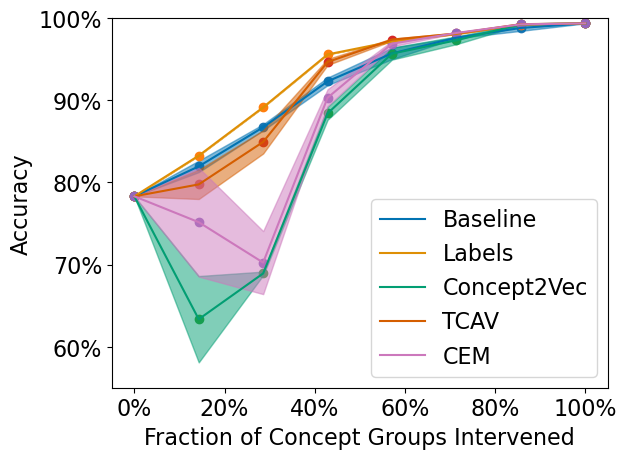

In [8]:
plot_intervention(["baseline","labels","concept2vec","tcav","cem"],["Baseline","Labels","Concept2Vec","TCAV","CEM"],"cub","CUB",28,[0.55,1],[0.6,0.7,0.8,0.9,1.0])
plt.savefig("figures/cub_intervention.pdf",dpi=300,bbox_inches='tight')

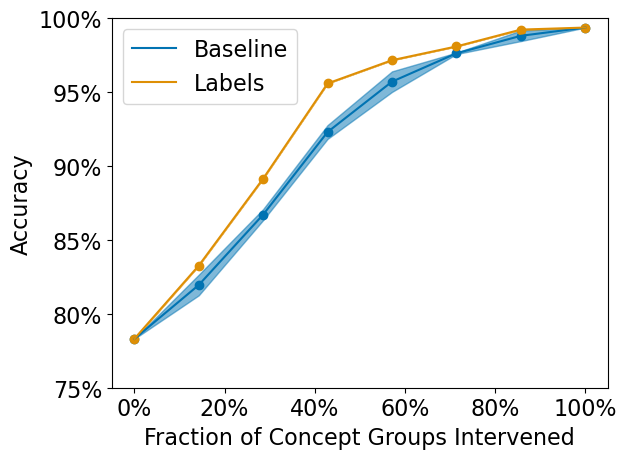

In [40]:
plot_intervention(["baseline","labels"],["Baseline","Labels"],"cub","CUB",28,[0.75,1],[0.75,0.8,0.85,0.9,0.95,1.0])
plt.savefig("figures/cub_intervention_label.pdf",dpi=300,bbox_inches='tight')

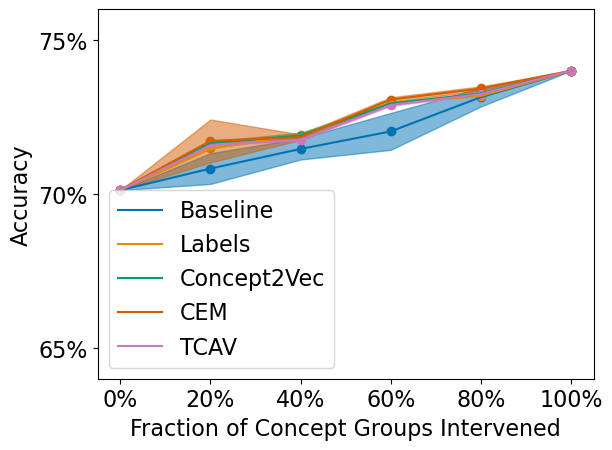

In [37]:
plot_intervention(["baseline","labels","concept2vec","cem","tcav"],["Baseline","Labels","Concept2Vec","CEM","TCAV"],"mnist","MNIST",20,[0.64,0.76],[0.65,0.7,0.75])
plt.savefig("figures/mnist_intervention.pdf",dpi=300,bbox_inches='tight')

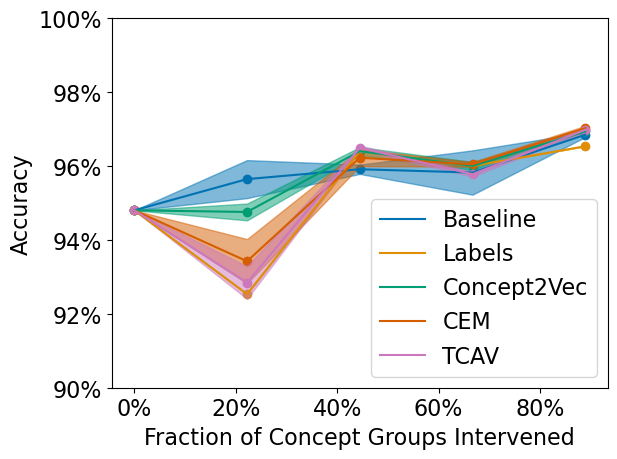

In [39]:
plot_intervention(["baseline","labels","concept2vec","cem","tcav"],["Baseline","Labels","Concept2Vec","CEM","TCAV"],"cub","dSprites",18,[0.9,1.0],[0.9,0.92,0.94,0.96,0.98,1.0])
plt.savefig("figures/dsprites_intervention.pdf",dpi=300,bbox_inches='tight')

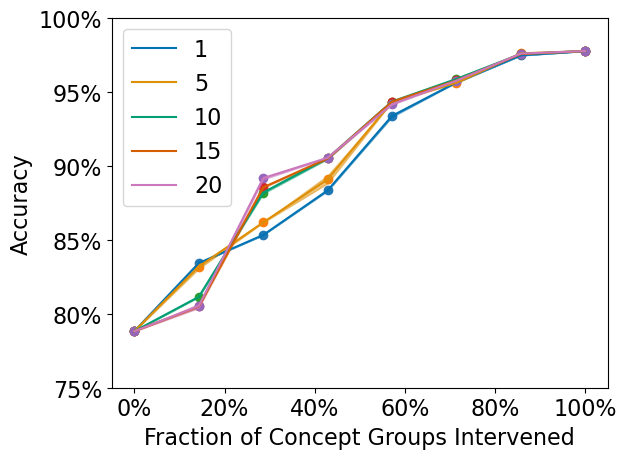

In [9]:
plot_intervention("shapley_indices",["1","5","10","15","20"],"cub","CUB",28,[0.75,1],[0.75,0.8,0.85,0.9,0.95,1.0])
plt.savefig("figures/shapley_indices.pdf",dpi=300,bbox_inches='tight')

### Explaining Intervention Experiments

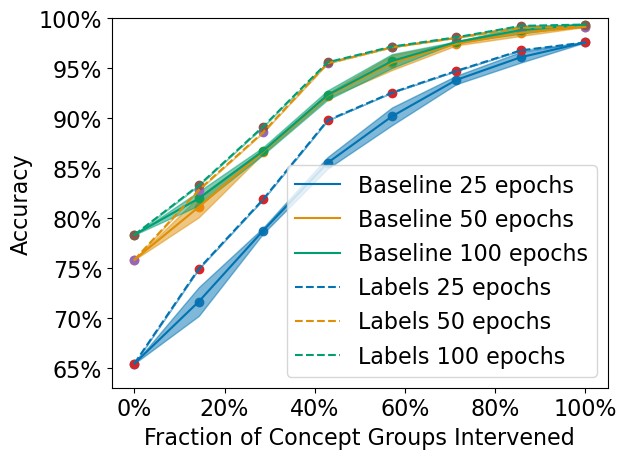

In [14]:
plot_intervention(["baseline_25","baseline_50","baseline","labels_25","labels_50","labels"],["Baseline 25 epochs","Baseline 50 epochs","Baseline 100 epochs","Labels 25 epochs","Labels 50 epochs","Labels 100 epochs"],"cub","CUB",28,[0.63,1],[0.65,0.7,0.75,0.8,0.85,0.9,0.95,1])
plt.savefig("figures/intervention_epochs.pdf",dpi=300,bbox_inches='tight')

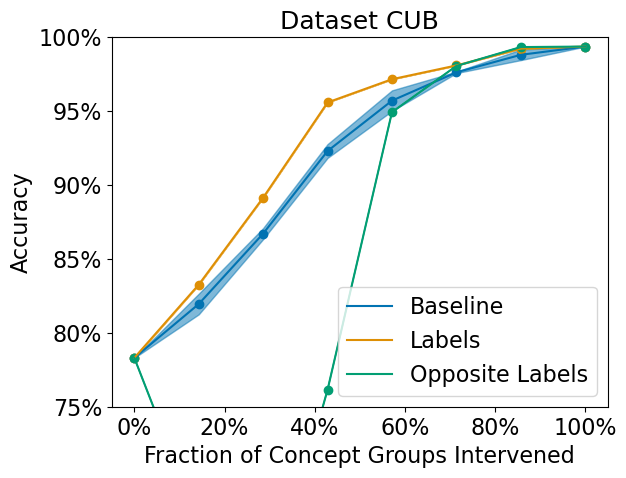

In [70]:
plot_intervention(["baseline","labels","anti_correlation"],["Baseline","Labels","Opposite Labels"],"cub","CUB",28,[0.75,1],[0.75,0.8,0.85,0.9,0.95,1])

### Extra Evaluation

/usr0/home/naveenr/miniconda3/envs/concepts/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == "":


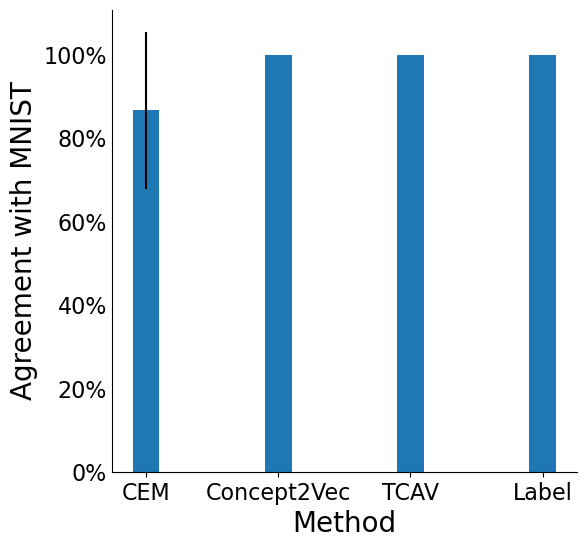

In [4]:
agreement_mnist = json.load(open("results/evaluation/ablation/agreement_mnist.json"))
methods = ["cem","concept2vec","tcav","label"]
names = ["CEM","Concept2Vec","TCAV","Label"]
avg_agreement_by_method = [np.mean(agreement_mnist[i]) for i in methods]
std_agreement_by_method = [np.std(agreement_mnist[i]) for i in methods]

fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
width = 0.2
ind = np.arange(len(methods))+width
ax.set_xticklabels(names)

# Set the y-axis label
ax.set_ylabel('Agreement with MNIST',fontsize=20)
plt.xlabel("Method",fontsize=20)

# Plot the bars with standard deviation error bars
ax.bar(ind, avg_agreement_by_method, width, label=names, yerr=std_agreement_by_method)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(names,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


In [11]:
agreement_mnist = json.load(open("results/evaluation/ablation/agreement_mnist.json"))
methods = ["cem","concept2vec","tcav","label"]
names = ["CEM","Concept2Vec","TCAV","Label"]
avg_agreement_by_method = [np.mean(agreement_mnist[i]) for i in methods]
std_agreement_by_method = [np.std(agreement_mnist[i]) for i in methods]

for i in range(len(methods)):
    if i == len(methods)-1:
        end = "\\bottomrule"
    else:
        end = ""
    print("{} & {}\\% $\\pm$ {}\\% \\\\ {}".format(names[i],
                                        round(avg_agreement_by_method[i]*100),
                                        round(std_agreement_by_method[i]*100),end))


CEM & 87\% $\pm$ 19\% \\ 
Concept2Vec & 100\% $\pm$ 0\% \\ 
TCAV & 100\% $\pm$ 0\% \\ 
Label & 100\% $\pm$ 0\% \\ \bottomrule


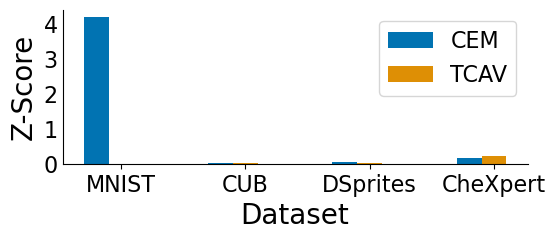

In [26]:
randomness_cem_tcav = json.load(open("results/evaluation/ablation/randomness_cem_tcav.json"))
datasets = ['mnist','cub','dsprites','chexpert']
methods = ['cem','tcav']
method_names = ["CEM","TCAV"]

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in methods:
        truth_data[d].append(abs(randomness_cem_tcav[m][d]['z_score']))

datasets = ['MNIST','CUB','DSprites','CheXpert']

cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t for t in group_data]
    means.append(group_means)
    
means = list(np.array(means).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,2))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Z-Score',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = [j for j in means[i]] # Flip Robustness due to definition
    ax.bar(ind + i*width, group_means, width, label=datasets)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks([0,1,2,3,4],fontsize=16)
ax.set_yticklabels([0,1,2,3,4])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(method_names,fontsize=16)

plt.savefig('figures/tcav_cem_randomness.pdf', dpi=300, bbox_inches='tight')    

# Show the plot
plt.show()


### Comparing different Hierarchies

In [12]:
hierarchy_by_metric = json.load(open("results/extra_evaluation/distance_cosine_euclidean_top_k.json"))

In [11]:
metric_distances = json.load(open('results/extra_evaluation/metric_distances.json','r'))

In [21]:
metric_distances

{'label': {'euclidean': {'euclidean': [0.0, 0.0],
   'cosine': [0.35714285714285704, 5.551115123125783e-17],
   'manhattan': [0.0, 0.0]},
  'cosine': {'euclidean': [0.35714285714285704, 5.551115123125783e-17],
   'cosine': [0.0, 0.0],
   'manhattan': [0.35714285714285704, 5.551115123125783e-17]},
  'manhattan': {'euclidean': [0.0, 0.0],
   'cosine': [0.35714285714285704, 5.551115123125783e-17],
   'manhattan': [0.0, 0.0]}},
 'shapley': {'euclidean': {'euclidean': [0.0, 0.0],
   'cosine': [0.2232142857142857, 0.002430049347999176],
   'manhattan': [0.38988095238095233, 0.0]},
  'cosine': {'euclidean': [0.2232142857142857, 0.002430049347999176],
   'cosine': [0.0, 0.0],
   'manhattan': [0.3015873015873016, 0.0028059792904227975]},
  'manhattan': {'euclidean': [0.38988095238095233, 0.0],
   'cosine': [0.3015873015873016, 0.0028059792904227975],
   'manhattan': [0.0, 0.0]}},
 'cem': {'euclidean': {'euclidean': [0.0, 0.0],
   'cosine': [0.4662698412698412, 0.1045297903581099],
   'manhattan

In [10]:
metric_to_nice = {
    'euclidean': 'Euclidean', 
    'cosine': 'Cosine',
    'manhattan': 'Manhattan'
}

method_to_nice = {
    'cem': 'CEM',
    'concept2vec':'Concept2Vec',
    'label': 'Label',
    'shapley': 'Shapley',
}

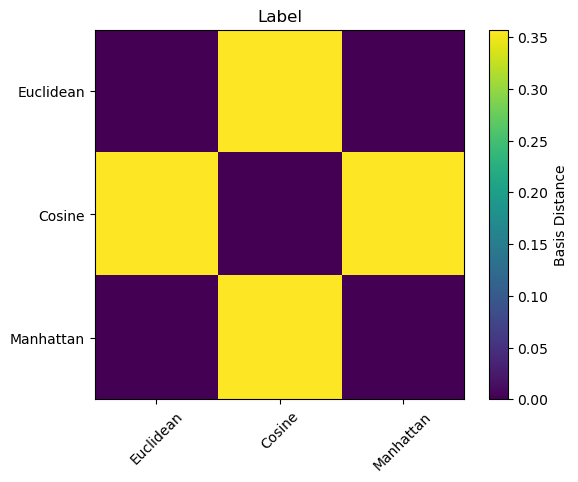

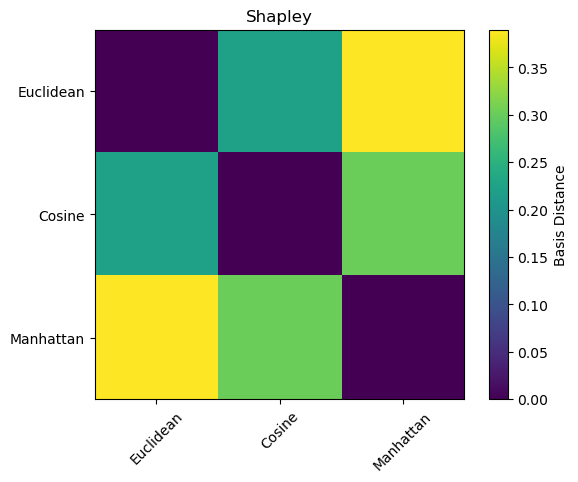

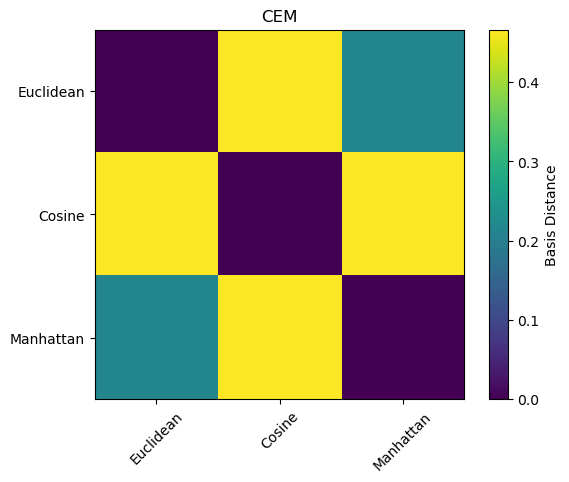

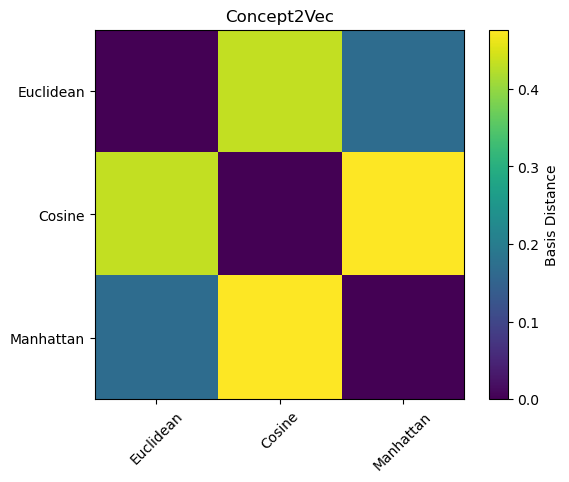

<Figure size 640x480 with 0 Axes>

In [13]:
for method in metric_distances:
    plt.title(method_to_nice[method])
    labels = ['euclidean','cosine','manhattan']

    metric_distances_method = np.array([[metric_distances[method][i][j][0] for j in labels] for i in labels])

    plt.imshow(metric_distances_method, cmap='viridis', interpolation='nearest')

    # Add labels and ticks
    plt.xticks(np.arange(len(labels)), [metric_to_nice[i] for i in labels], rotation=45)
    plt.yticks(np.arange(len(labels)), [metric_to_nice[i] for i in labels])
    colorbar = plt.colorbar()
    colorbar.set_label('Basis Distance')

    plt.savefig("figures/metric_distance_{}.pdf".format(method), dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


    plt.figure() 

In [5]:
distance_by_hierarchy_cub = json.load(open('results/extra_evaluation/distance_between_hierarchies.json','r'))

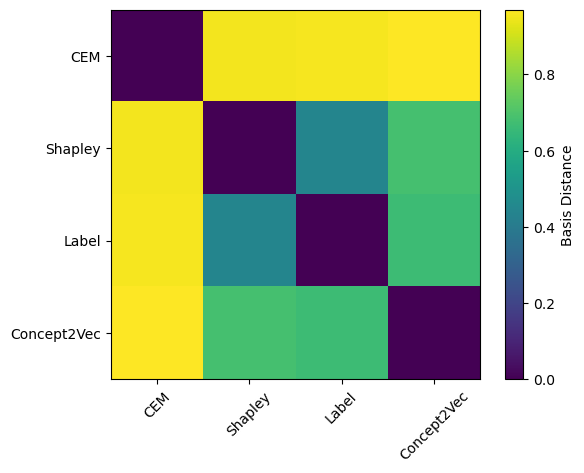

In [9]:
labels = ['cem','shapley','label','concept2vec']

plt.imshow(distance_by_hierarchy_cub, cmap='viridis', interpolation='nearest')

# Add labels and ticks
plt.xticks(np.arange(len(labels)), [method_to_nice[i] for i in labels], rotation=45)
plt.yticks(np.arange(len(labels)), [method_to_nice[i] for i in labels])
colorbar = plt.colorbar()
colorbar.set_label('Basis Distance')

plt.savefig("figures/hierarchy_distances.pdf", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

### Comparison With Ground Truth

In [50]:
mnist_distances = json.load(open('results/evaluation/ablation/distance_mnist.json','r'))
cub_distances_part_1 = json.load(open('results/evaluation/ablation/distance_cub_first_part.json','r'))
cub_distances_part_2 = json.load(open('results/evaluation/ablation/distance_cub_second_part.json','r'))

In [51]:
mnist_distances

{'CEM': [0.06666666666666665, 0.09428090415820632],
 'Concept2Vec': [0.0, 0.0],
 'Label': [0.0, 0.0],
 'TCAV': [0.01666666666666668, 0.023570226039551608]}

In [52]:
cub_distances_part_1

{'CEM': [0.9761904761904762, 0.004860098695998352],
 'Concept2Vec': [0.9920634920634921, 0.0028059792904227975],
 'Label': [0.9970238095238096, 1.1102230246251565e-16],
 'TCAV': [0.9781746031746031, 0.00505855110475478]}

In [53]:
cub_distances_part_2

{'CEM': [0.9632936507936508, 0.01581089032788613],
 'Concept2Vec': [0.8273809523809522, 0.004208968935634196],
 'Label': [0.7976190476190478, 1.1102230246251565e-16],
 'TCAV': [0.9523809523809524, 0.004208968935634249]}

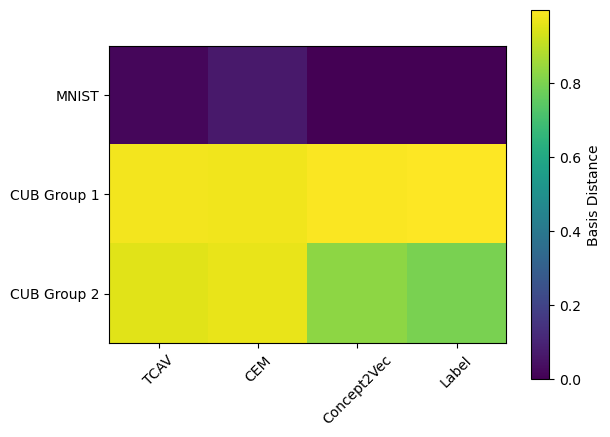

In [56]:
labels_x = ['TCAV','CEM','Concept2Vec','Label']
labels_y = ['MNIST','CUB Group 1', 'CUB Group 2'] 

distances_as_matrix = [
    [j[i][0] for j in [mnist_distances,cub_distances_part_1,cub_distances_part_2]] for i in labels_x
]

plt.imshow(np.array(distances_as_matrix).T, cmap='viridis', interpolation='nearest')

# Add labels and ticks
plt.xticks(np.arange(len(labels_x)), [i for i in labels_x], rotation=45)
plt.yticks(np.arange(len(labels_y)), labels_y)
colorbar = plt.colorbar()
colorbar.set_label('Basis Distance')

plt.savefig("figures/heuristic_distances.pdf", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

### Qualitative Evaluation

#### MNIST

In [ ]:
dataset = MNIST_Dataset()
attributes = dataset.get_attributes()

In [ ]:
mnist_hierarchy_labels = create_hierarchy(create_ward_hierarchy,load_label_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_labels)

           ---- 1_color
      ----|
           ---- 1_number

 ----|
                ---- 7_color
           ----|
                ---- 7_number

      ----|
                     ---- 3_color
                ----|
                     ---- 3_number

           ----|
                          ---- 2_color
                     ----|
                          ---- 2_number

                ----|
                               ---- 9_color
                          ----|
                               ---- 9_number

                     ----|
                                    ---- 0_color
                               ----|
                                    ---- 0_number

                          ----|
                                         ---- 6_color
                                    ----|
                                         ---- 6_number

                               ----|
                                              ---- 8_color
                                      

In [ ]:
mnist_hierarchy_shapley = create_hierarchy(create_ward_hierarchy,load_shapley_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_shapley)

           ---- 1_color
      ----|
           ---- 1_number

 ----|
                ---- 8_color
           ----|
                ---- 8_number

      ----|
                     ---- 3_color
                ----|
                     ---- 3_number

           ----|
                          ---- 0_color
                     ----|
                          ---- 0_number

                ----|
                               ---- 6_color
                          ----|
                               ---- 6_number

                     ----|
                                    ---- 9_color
                               ----|
                                    ---- 9_number

                          ----|
                                         ---- 4_color
                                    ----|
                                         ---- 4_number

                               ----|
                                              ---- 7_color
                                      

In [ ]:
mnist_hierarchy_tcav = create_hierarchy(create_ward_hierarchy,load_tcav_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_tcav)

      ---- 0_color
 ----|
                ---- 8_color
           ----|
                ---- 8_number

      ----|
                     ---- 4_color
                ----|
                     ---- 4_number

           ----|
                               ---- 3_color
                          ----|
                               ---- 3_number

                     ----|
                               ---- 6_color
                          ----|
                               ---- 6_number


                ----|
                               ---- 2_color
                          ----|
                               ---- 2_number

                     ----|
                                    ---- 5_color
                               ----|
                                    ---- 5_number

                          ----|
                                         ---- 7_color
                                    ----|
                                         ---- 7_number

            

In [ ]:
mnist_hierarchy_cem = create_hierarchy(create_ward_hierarchy,load_cem_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_cem)

                ---- 1_color
           ----|
                ---- 1_number

      ----|
                ---- 5_color
           ----|
                ---- 5_number


 ----|
                     ---- 8_color
                ----|
                     ---- 8_number

           ----|
                     ---- 9_color
                ----|
                     ---- 9_number


      ----|
                     ---- 0_color
                ----|
                     ---- 0_number

           ----|
                               ---- 7_color
                          ----|
                               ---- 7_number

                     ----|
                               ---- 2_color
                          ----|
                               ---- 2_number


                ----|
                               ---- 4_color
                          ----|
                               ---- 4_number

                     ----|
                                    ---- 6_color
           

In [ ]:
mnist_hierarchy_concept2vec = create_hierarchy(create_ward_hierarchy,load_concept2vec_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_concept2vec)

                ---- 1_color
           ----|
                ---- 1_number

      ----|
                          ---- 6_color
                     ----|
                          ---- 6_number

                ----|
                          ---- 0_color
                     ----|
                          ---- 0_number


           ----|
                          ---- 3_color
                     ----|
                          ---- 3_number

                ----|
                               ---- 8_color
                          ----|
                               ---- 8_number

                     ----|
                               ---- 2_color
                          ----|
                               ---- 2_number





 ----|
                ---- 7_color
           ----|
                ---- 7_number

      ----|
                     ---- 4_color
                ----|
                     ---- 4_number

           ----|
                          ---- 9_color
         

#### CUB

In [15]:
dataset = CUB_Dataset()
attributes = dataset.get_attributes()

In [16]:
cub_hierarchy_labels = create_hierarchy(create_ward_hierarchy,load_label_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_labels)

                     ---- has_throat_color::white
                ----|
                          ---- has_breast_color::white
                     ----|
                               ---- has_underparts_color::white
                          ----|
                               ---- has_belly_color::white



           ----|
                               ---- has_upper_tail_color::grey
                          ----|
                               ---- has_under_tail_color::grey

                     ----|
                               ---- has_wing_color::grey
                          ----|
                                    ---- has_primary_color::grey
                               ----|
                                         ---- has_upperparts_color::grey
                                    ----|
                                         ---- has_back_color::grey




                ----|
                          ---- has_bill_length::about_the_same_as_head
               

In [18]:
cub_hierarchy_shapley = create_hierarchy(create_ward_hierarchy,load_shapley_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_shapley)

                          ---- has_upper_tail_color::buff
                     ----|
                          ---- has_under_tail_color::buff

                ----|
                               ---- has_upperparts_color::buff
                          ----|
                                    ---- has_wing_color::buff
                               ----|
                                    ---- has_back_color::buff


                     ----|
                               ---- has_nape_color::buff
                          ----|
                               ---- has_primary_color::buff



           ----|
                     ---- has_throat_color::buff
                ----|
                          ---- has_breast_color::buff
                     ----|
                               ---- has_underparts_color::buff
                          ----|
                               ---- has_belly_color::buff




      ----|
                     ---- has_belly_color::brown
          

In [ ]:
cub_hierarchy_tcav = create_hierarchy(create_ward_hierarchy,load_tcav_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_tcav)

                ---- has_upper_tail_color::black
           ----|
                ---- has_throat_color::yellow

      ----|
                          ---- has_breast_pattern::striped
                     ----|
                          ---- has_forehead_color::yellow

                ----|
                          ---- has_underparts_color::yellow
                     ----|
                                    ---- has_throat_color::black
                               ----|
                                    ---- has_wing_shape::pointed-wings

                          ----|
                                         ---- has_wing_color::yellow
                                    ----|
                                              ---- has_belly_color::yellow
                                         ----|
                                              ---- has_primary_color::yellow


                               ----|
                                              ---- has_under_tail_

In [17]:
cub_hierarchy_cem = create_hierarchy(create_ward_hierarchy,load_cem_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_cem)

                ---- has_belly_color::grey
           ----|
                     ---- has_upperparts_color::yellow
                ----|
                          ---- has_underparts_color::yellow
                     ----|
                          ---- has_upper_tail_color::white



      ----|
                ---- has_back_color::yellow
           ----|
                          ---- has_wing_pattern::striped
                     ----|
                               ---- has_primary_color::yellow
                          ----|
                                         ---- has_forehead_color::white
                                    ----|
                                              ---- has_wing_pattern::multi-colored
                                         ----|
                                                   ---- has_primary_color::brown
                                              ----|
                                                        ---- has_back_color::white
   

In [19]:
cub_hierarchy_concept2vec = create_hierarchy(create_ward_hierarchy,load_concept2vec_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_concept2vec)

                          ---- has_wing_color::brown
                     ----|
                               ---- has_upperparts_color::brown
                          ----|
                               ---- has_primary_color::brown


                ----|
                          ---- has_upper_tail_color::brown
                     ----|
                          ---- has_forehead_color::brown


           ----|
                     ---- has_wing_color::buff
                ----|
                          ---- has_back_color::brown
                     ----|
                               ---- has_under_tail_color::brown
                          ----|
                               ---- has_crown_color::brown




      ----|
                     ---- has_underparts_color::brown
                ----|
                     ---- has_breast_color::brown

           ----|
                               ---- has_breast_color::buff
                          ----|
                      

#### DSprites

In [ ]:
dataset = DSprites_Dataset()
attributes = dataset.get_attributes()

In [ ]:
dsprites_hierarchy_shapley = create_hierarchy(create_ward_hierarchy,load_shapley_vectors_simple,dataset,'',attributes,43)
print(dsprites_hierarchy_shapley)

           ---- is_scale_0.7
      ----|
                ---- is_scale_0.5
           ----|
                     ---- is_orientation_90
                ----|
                     ---- is_y_0



 ----|
                ---- is_scale_0.6
           ----|
                ---- is_orientation_0

      ----|
                     ---- is_ellipse
                ----|
                          ---- is_scale_1
                     ----|
                          ---- is_x_16


           ----|
                          ---- is_heart
                     ----|
                          ---- is_orientation_180

                ----|
                               ---- is_square
                          ----|
                                    ---- is_x_0
                               ----|
                                         ---- is_white
                                    ----|
                                         ---- is_scale_0.9



                     ----|
                      

#### CheXpert

In [ ]:
dataset = Chexpert_Dataset()
attributes = dataset.get_attributes()

In [ ]:
chexpert_hierarchy_shapley = create_hierarchy(create_ward_hierarchy,load_shapley_vectors_simple,dataset,'',attributes,43)
print(chexpert_hierarchy_shapley)

      ---- Support Devices
 ----|
           ---- Lung Lesion
      ----|
                               ---- Lung Opacity
                          ----|
                                    ---- Consolidation
                               ----|
                                    ---- Fracture


                     ----|
                               ---- Enlarged Cardiom
                          ----|
                               ---- Pneumothroax


                ----|
                          ---- Pneumonia
                     ----|
                          ---- Pleural Other


           ----|
                     ---- Pleural Effusion
                ----|
                          ---- Edema
                     ----|
                               ---- Cardiomegaly
                          ----|
                               ---- Atelectasis


In [ ]:
chexpert_hierarchy_label = create_hierarchy(create_ward_hierarchy,load_label_vectors_simple,dataset,'',attributes,43)
print(chexpert_hierarchy_label)

           ---- Edema
      ----|
                ---- Atelectasis
           ----|
                     ---- Cardiomegaly
                ----|
                          ---- Enlarged Cardiom
                     ----|
                                    ---- Lung Opacity
                               ----|
                                         ---- Consolidation
                                    ----|
                                              ---- Pneumonia
                                         ----|
                                              ---- Pleural Other



                          ----|
                                    ---- Pneumothroax
                               ----|
                                    ---- Fracture






 ----|
           ---- Support Devices
      ----|
                ---- Lung Lesion
           ----|
                ---- Pleural Effusion
